# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
import os
import joblib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [5]:
# Load and read the file
df = pd.read_csv("/content/drive/My Drive/Research Internship/dataset/RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
# Data Cleaning
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [7]:
print(df.shape)

# Find columns with null percentage greater than 20%
null_percentage_threshold = 20
high_null_columns = df.columns[df.isnull().mean() * 100 > null_percentage_threshold]

print("\nColumns with null percentage greater than 80%:")
print(high_null_columns)

# Remove columns with null percentage greater than 20%
df = df.drop(columns=high_null_columns)

print("\n",df.shape)

(12316, 32)

Columns with null percentage greater than 80%:
Index(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality',
       'Fitness_of_casuality'],
      dtype='object')

 (12316, 28)


In [8]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [9]:
# Drop
df.drop(columns = [
    'Owner_of_vehicle',
    'Number_of_casualties',
    'Sex_of_casualty',
    'Age_band_of_casualty',
], inplace = True)

In [10]:
# removing rows with null values
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(12316, 24)
(8664, 24)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8664 entries, 1 to 12315
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         8664 non-null   object
 1   Day_of_week                  8664 non-null   object
 2   Age_band_of_driver           8664 non-null   object
 3   Sex_of_driver                8664 non-null   object
 4   Educational_level            8664 non-null   object
 5   Vehicle_driver_relation      8664 non-null   object
 6   Driving_experience           8664 non-null   object
 7   Type_of_vehicle              8664 non-null   object
 8   Area_accident_occured        8664 non-null   object
 9   Lanes_or_Medians             8664 non-null   object
 10  Road_allignment              8664 non-null   object
 11  Types_of_Junction            8664 non-null   object
 12  Road_surface_type            8664 non-null   object
 13  Road_surface_conditions      8664 non

In [12]:
#Distribution of Accident severity
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     7354
Serious Injury    1209
Fatal injury       101
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident severity')

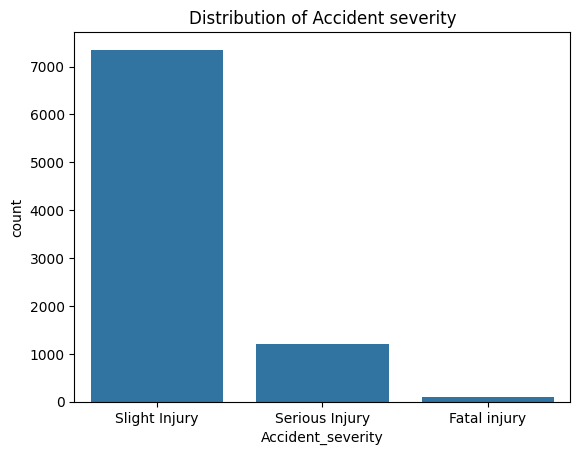

In [13]:
#plotting the final class
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')

In [14]:
# encoding categorical data
categorical_columns = df.select_dtypes(include=['object','bool']).columns

label_encoders = {}

# Encoding categorical columns
for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
1,407,1,1,1,4,0,3,11,6,4,...,3,2,8,2,2,3,3,5,16,2
3,575,3,0,1,4,0,2,11,6,6,...,0,2,8,2,2,2,2,5,1,2
7,425,0,0,1,4,0,1,0,9,6,...,3,2,8,2,10,3,3,5,12,2
8,425,0,0,1,4,0,3,5,4,6,...,3,2,3,2,2,2,2,0,1,2
9,425,0,0,1,4,0,0,0,9,4,...,3,2,3,2,10,1,2,5,9,1


Text(0.5, 1.0, 'Distribution of Accident severity')

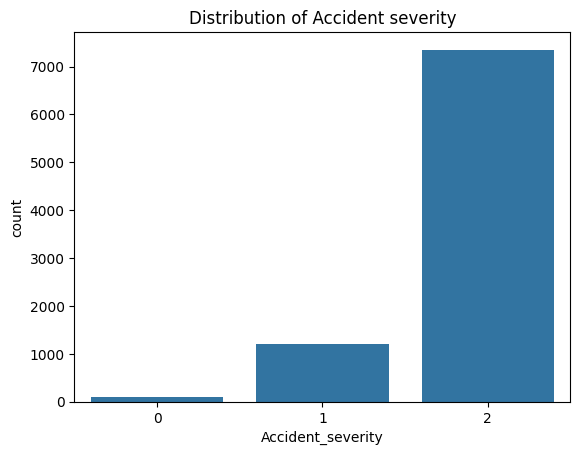

In [15]:
#plotting the final class
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')

In [16]:
# Decoding back to original values
decoded_df = df.copy()
for col in categorical_columns:
    # Use the mapping of classes to their original values
    decoded_df[col] = label_encoders[col].inverse_transform(df[col])

decoded_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,...,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,na,na,Not a Pedestrian,Overtaking,Slight Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Office areas,other,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Pedestrian,3,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Residential areas,other,...,Daylight,Normal,Vehicle with vehicle collision,2,U-Turn,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Industrial areas,other,...,Daylight,Normal,Collision with roadside-parked vehicles,2,Going straight,Pedestrian,3,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Residential areas,Undivided Two way,...,Daylight,Normal,Collision with roadside-parked vehicles,2,U-Turn,Passenger,3,Not a Pedestrian,Moving Backward,Serious Injury


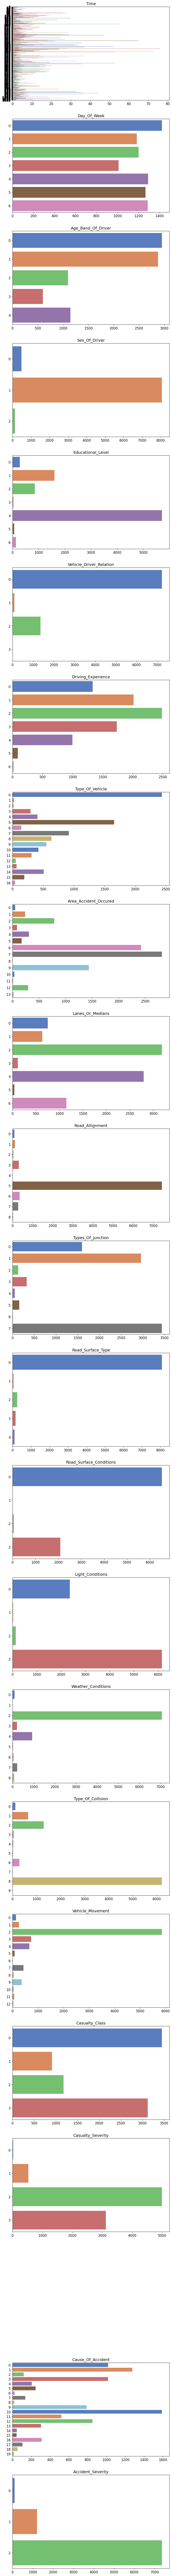

In [17]:
#count plot for categorical values
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical_columns:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1

# Train-test Split

In [18]:
# Separate features (X) and target variable (y)

y = df['Accident_severity'].copy()
X = df.drop('Accident_severity', axis=1).copy()
column_names = X.columns

column_names

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved', 'Vehicle_movement',
       'Casualty_class', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

In [19]:
y.unique()

array([2, 1, 0])

In [22]:
# Save processed data

processed_data_ethiopia = pd.concat([pd.DataFrame(X, columns=column_names), pd.Series(y, name='Accident_severity')], axis=1)
processed_data_ethiopia.to_csv(os.path.join(save_dir, 'processed_data_ethiopia.csv'), index=False)

print(processed_data_ethiopia.shape)
print(X.shape)
print(y.shape)

processed_data_ethiopia.head()

(8664, 24)
(8664, 23)
(8664,)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
1,407,1,1,1,4,0,3,11,6,4,...,3,2,8,2,2,3,3,5,16,2
3,575,3,0,1,4,0,2,11,6,6,...,0,2,8,2,2,2,2,5,1,2
7,425,0,0,1,4,0,1,0,9,6,...,3,2,8,2,10,3,3,5,12,2
8,425,0,0,1,4,0,3,5,4,6,...,3,2,3,2,2,2,2,0,1,2
9,425,0,0,1,4,0,0,0,9,4,...,3,2,3,2,10,1,2,5,9,1


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (6931, 23)
y_train:  (6931,)
X_test:  (1733, 23)
y_test:  (1733,)


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("X_train_smote: ", X_train_smote.shape)
print("y_train_smote: ", y_train_smote.shape)

X_train_smote:  (17625, 23)
y_train_smote:  (17625,)


Text(0.5, 1.0, 'Distribution of Accident severity')

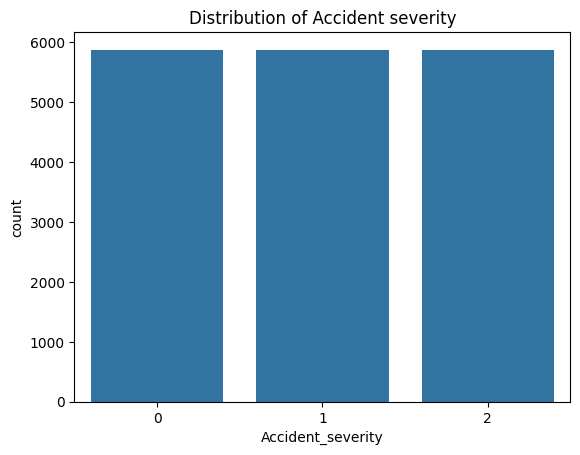

In [ ]:
#plotting the final class
sns.countplot(x = y_train_smote)
plt.title('Distribution of Accident severity')

# Saving The Data

In [21]:
# Create the directory if it doesn't exist
save_dir = '/content/drive/My Drive/XAI/processedData'
os.makedirs(save_dir, exist_ok=True)

In [ ]:
# Save train data
train_data_ethiopia = pd.concat([pd.DataFrame(X_train, columns=column_names), pd.Series(y_train, name='Accident_severity')], axis=1)
train_data_ethiopia.to_csv(os.path.join(save_dir, 'train_data_ethiopia.csv'), index=False)

print(train_data_ethiopia.shape)
print(X_train.shape)
print(y_train.shape)

train_data_ethiopia.head()

(6931, 24)
(6931, 23)
(6931,)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
8131,182,1,0,1,4,0,4,0,6,4,...,3,4,8,1,2,3,3,5,10,2
8563,551,4,0,1,2,2,1,15,6,2,...,3,2,8,2,2,0,2,5,12,2
1738,74,2,1,1,4,0,3,7,6,1,...,3,2,8,2,2,3,3,5,3,2
655,348,0,0,1,2,0,0,11,9,4,...,3,2,8,3,3,0,2,5,12,1
7459,13,0,4,1,4,2,3,14,1,6,...,0,2,2,2,2,3,3,5,10,2


In [ ]:
# Save test data
test_data_ethiopia = pd.concat([pd.DataFrame(X_test, columns=column_names), pd.Series(y_test, name='Accident_severity')], axis=1)
test_data_ethiopia.to_csv(os.path.join(save_dir, 'test_data_ethiopia.csv'), index=False)

train_data_ethiopia.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
8131,182,1,0,1,4,0,4,0,6,4,...,3,4,8,1,2,3,3,5,10,2
8563,551,4,0,1,2,2,1,15,6,2,...,3,2,8,2,2,0,2,5,12,2
1738,74,2,1,1,4,0,3,7,6,1,...,3,2,8,2,2,3,3,5,3,2
655,348,0,0,1,2,0,0,11,9,4,...,3,2,8,3,3,0,2,5,12,1
7459,13,0,4,1,4,2,3,14,1,6,...,0,2,2,2,2,3,3,5,10,2


In [ ]:
# Save train data - smote
train_data_smote = pd.concat([pd.DataFrame(X_train_smote, columns=column_names), pd.Series(y_train_smote, name='Accident_severity')], axis=1)
train_data_smote.to_csv(os.path.join(save_dir, 'train_data_smote.csv'), index=False)

print(train_data_smote.shape)
print(X_train_smote.shape)
print(y_train_smote.shape)

train_data_smote.head()

(17625, 24)
(17625, 23)
(17625,)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,182,1,0,1,4,0,4,0,6,4,...,3,4,8,1,2,3,3,5,10,2
1,551,4,0,1,2,2,1,15,6,2,...,3,2,8,2,2,0,2,5,12,2
2,74,2,1,1,4,0,3,7,6,1,...,3,2,8,2,2,3,3,5,3,2
3,348,0,0,1,2,0,0,11,9,4,...,3,2,8,3,3,0,2,5,12,1
4,13,0,4,1,4,2,3,14,1,6,...,0,2,2,2,2,3,3,5,10,2
